# Preparation

In [133]:
dataset = 'fraud'
ntrain = 0 ; latent_dim = 3
steps = 500
learning_rate = 0.001
batch_size = 16


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
import sys
sys.version

'3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]'

In [136]:
import pandas as pd
data= pd.read_csv('./creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [137]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


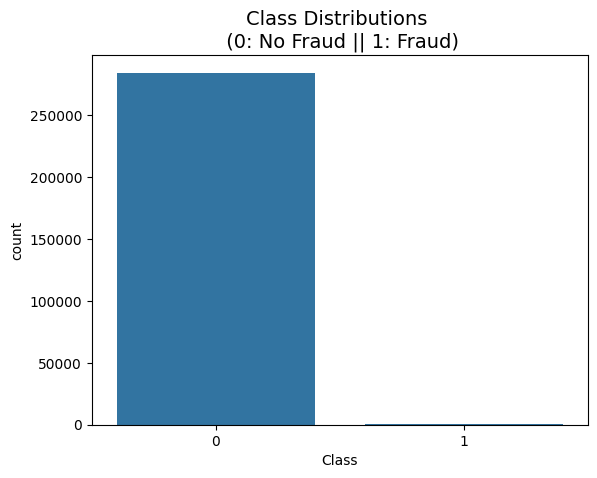

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

plt.show()


In [139]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [140]:
class_0.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [141]:
class_1.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [142]:
X = data.drop("Class", axis=1)
y = data['Class']

In [143]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [144]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print('y value counts:')
print(y.value_counts())

X shape: (284807, 30)
y shape: (284807,)
y value counts:
Class
0    284315
1       492
Name: count, dtype: int64


In [145]:

normal_indices = y[y == 0].index
abnormal_indices = y[y == 1].index

X_train_normal_indices = np.random.choice(normal_indices, 1000, replace=False)
X_train_normal = X[X_train_normal_indices]
y_train_normal = y[X_train_normal_indices]

X_train = X_train_normal
Y_train = y_train_normal.values

remaining_normal_indices = list(set(normal_indices) - set(X_train_normal_indices))
X_test_normal_indices = np.random.choice(remaining_normal_indices, 100, replace=False)
X_test_normal = X[X_test_normal_indices]
y_test_normal = y[X_test_normal_indices]

X_test_abnormal_indices = np.random.choice(abnormal_indices, 100, replace=False)
X_test_abnormal = X[X_test_abnormal_indices]
y_test_abnormal = y[X_test_abnormal_indices]

X_test = np.concatenate((X_test_normal, X_test_abnormal), axis=0)
Y_test = np.concatenate((y_test_normal, y_test_abnormal), axis=0)

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test_normal shape: {X_test_normal.shape}')
print(f'X_test_abnormal shape: {X_test_abnormal.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')


X_train shape: (1000, 30)
Y_train shape: (1000,)
X_test_normal shape: (100, 30)
X_test_abnormal shape: (100, 30)
X_test shape: (200, 30)
Y_test shape: (200,)


In [146]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import os

class SVDD(nn.Module):
    def __init__(self, latent_dim, num_filters=3):
        super(SVDD, self).__init__()
        self.num_filters = num_filters
        self.latent_dim = latent_dim
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=self.num_filters, kernel_size=2, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(num_features=self.num_filters)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=self.num_filters, out_channels=self.num_filters, kernel_size=2, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(num_features=self.num_filters)
        self.conv3 = nn.Conv1d(in_channels=self.num_filters, out_channels=2, kernel_size=2, stride=1, padding=1)
        self.bn3 = nn.BatchNorm1d(num_features=2)

        self.fc1 = nn.Linear(8, self.latent_dim) 

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)  
        x = self.fc1(x)
        return x
    
    

x_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)


train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1)


svdd = SVDD(latent_dim=latent_dim)

svdd = svdd.cuda()

input_size = (1, 30)
summary(svdd, input_size=input_size)

weight_decay = 0.001
optimizer = torch.optim.Adam(svdd.parameters(), lr=0.001, weight_decay=weight_decay)
loss_history = []

c = None

def initialize_center_c(dataloader, model):
    model.eval()
    with torch.no_grad():
        n_samples = 0
        center = torch.zeros(model.latent_dim, device=next(model.parameters()).device)
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.unsqueeze(1).cuda()  
            outputs = model(inputs)
            center += torch.sum(outputs, dim=0)
            center /= outputs.shape[0]
            break
    model.train()
    return center

def train(num_steps):
    global c
    for step in range(num_steps):
        data = next(iter(train_dataloader))
        inputs, _ = data  
        inputs = inputs.unsqueeze(1).cuda()  
        optimizer.zero_grad()


        if c is None:
            c = initialize_center_c(train_dataloader, svdd)


        outputs = svdd(inputs)
        loss = torch.mean(torch.sum((outputs - c) ** 2, dim=1))


        l2_reg = torch.tensor(0., device=inputs.device)
        for param in svdd.parameters():
            l2_reg += torch.norm(param)
        loss += weight_decay * l2_reg

        loss.backward()
        optimizer.step()


        loss_history.append(loss.item())


        if step % 10 == 0:
            print('Step: {} | Loss: {:.6f}'.format(step, loss.data))


train(num_steps=500)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 3, 31]               9
       BatchNorm1d-2                [-1, 3, 31]               6
         MaxPool1d-3                [-1, 3, 15]               0
            Conv1d-4                [-1, 3, 16]              21
       BatchNorm1d-5                [-1, 3, 16]               6
         MaxPool1d-6                 [-1, 3, 8]               0
            Conv1d-7                 [-1, 2, 9]              14
       BatchNorm1d-8                 [-1, 2, 9]               4
         MaxPool1d-9                 [-1, 2, 4]               0
           Linear-10                    [-1, 3]              27
Total params: 87
Trainable params: 87
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size 

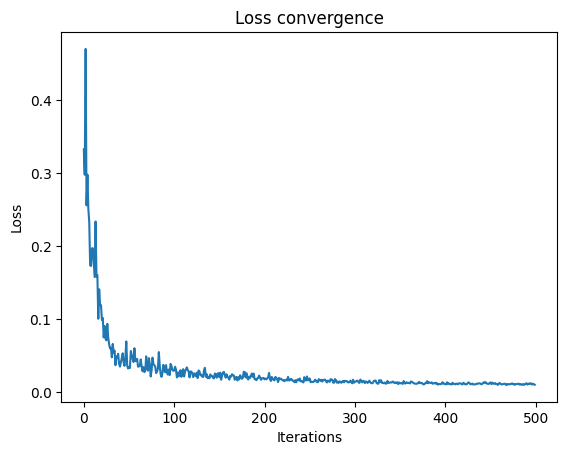

In [151]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
loss_image_path = f'./records/fraud/loss_{timestamp}.png'

plt.style.use('default')
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss convergence")

plt.savefig(loss_image_path)
plt.show()

In [148]:

def test(model, test_dataloader, ntrain):
    global c  
    y_true = []
    y_pred = []
    model = model.cuda()

    for data, labels in test_dataloader:
        inputs = data.unsqueeze(1).cuda()  
        labels = labels.cuda()

        outputs = model(inputs.float())
        dist = torch.sum((outputs - c) ** 2, dim=1)

        for label, d in zip(labels.cpu().numpy(), dist.detach().cpu().numpy()):
            if label == ntrain:
                y_true.append(0)
            else:
                y_true.append(1)
            y_pred.append(d.item())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    return auc, y_pred, y_true, fpr, tpr


auc, y_pred, y_true, fpr, tpr = test(svdd, test_dataloader, 0)

(array([132.,  18.,  16.,  15.,   7.,   5.,   2.,   1.,   1.,   3.]),
 array([6.20206556e-05, 1.11072648e-02, 2.21525089e-02, 3.31977531e-02,
        4.42429972e-02, 5.52882413e-02, 6.63334855e-02, 7.73787296e-02,
        8.84239737e-02, 9.94692179e-02, 1.10514462e-01]),
 <BarContainer object of 10 artists>)

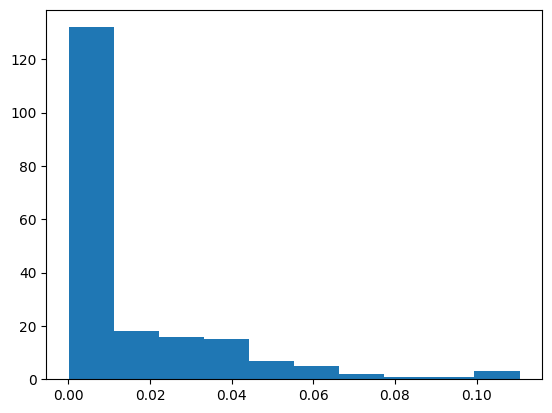

In [149]:
plt.hist(y_pred)

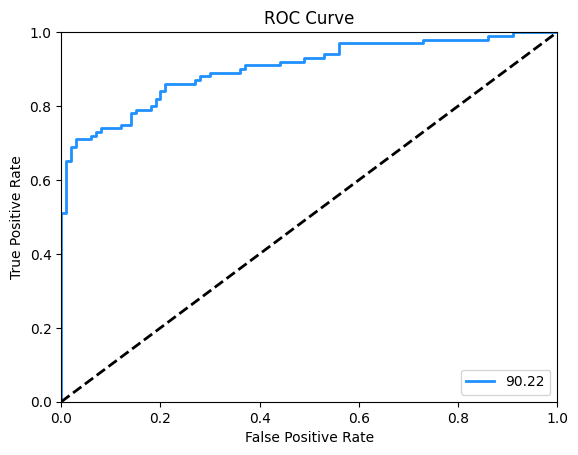

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='dodgerblue', lw=lw, label="{:.2f}".format(auc * 100))
plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


def save_auc_to_file(auc, file_name):
    auc = "{:.2f}".format(auc * 100)
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    if not os.path.exists(file_name):
        with open(file_name, 'w') as f:
            f.write("AUC Results\n")
    with open(file_name, 'a') as f:
        f.write(str(auc) + "\n")

auc_file_path = "./records/fraud/auc.txt"
save_auc_to_file(auc, auc_file_path)
